In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

list_names = ['User1','User3', 'User4', 'User5', 'User6', 'User7', 'User8']
nbUsers = len(list_names)

addword = 'Closest'

In [2]:
nbUsers

7

In [3]:
boneNames = []
bones = pd.Series()
bones = pd.read_csv('./BoneNames.csv')
bones = bones.transpose()
bones = bones.drop(bones.index[0])
for i in range(0, 19):
    boneNames.append('R-' + bones.iloc[0, i])
for i in range(0, 19):
    boneNames.append('L-' + bones.iloc[0, i])
    
for i in range(0, len(boneNames)):
    txt = boneNames[i]
    boneNames[i] = txt.replace('_CapsuleCollider', '')

In [4]:
finalData = pd.DataFrame()
for user in range(0, int(nbUsers)):   
    finalUser = pd.DataFrame()
    finalUser = pd.read_csv('./Analysis/ValidateMe/'+ list_names[user]+ addword+ '.csv', sep = ";", decimal = '.')
    del finalUser['Unnamed: 0']
    finalUser['User'] = list_names[user]
    
    finalData = pd.concat([finalUser, finalData], axis = 0, sort = True)

In [5]:
finalData.columns

Index(['ClosToFinal.0', 'ClosToFinal.1', 'ClosToFinal.10', 'ClosToFinal.11',
       'ClosToFinal.12', 'ClosToFinal.13', 'ClosToFinal.14', 'ClosToFinal.15',
       'ClosToFinal.16', 'ClosToFinal.17',
       ...
       'Speed.37', 'Speed.4', 'Speed.5', 'Speed.6', 'Speed.7', 'Speed.8',
       'Speed.9', 'Task', 'Time', 'User'],
      dtype='object', length=158)

In [6]:
tasks = ['Touch', 'Raise', 'Pull', 'Push', 'Push Down']
objects = ['obj0', 'obj1', 'obj2', 'obj3', 'obj4', 'obj5', 'obj6', 'Cube', 'Cylinder']
scales = ['small', 'medium', 'large']

In [7]:
finalData[(finalData['Time'] == 500) & (finalData['Config'] == 3)]['PredToFinal.9'].dropna().describe()

count    6.000000
mean     6.010937
std      4.098734
min      0.000000
25%      3.073954
50%      7.755454
75%      9.105979
max      9.485104
Name: PredToFinal.9, dtype: float64

## Average all phalanges per Time interval (keep User discrimination)

In [8]:
meanHands = pd.DataFrame()
for user in range(0, int(nbUsers)):
    meanHand = pd.DataFrame()
    
    nbPhal = 0
    nbPhalClos = 0
    nbPhalPos = 0
    nbPhalSpeed = 0
    averagePred = 0
    averagePos = 0
    averageClos = 0
    averageSpeed = 0
    
    for time in range(0, 3050, 50):
        condUser = (finalData['User'] == list_names[user]) & (finalData['Time'] == time)

        for phal in range(0, 38):
            if('PredToFinal.'+str(phal) in finalData[condUser].columns):
                #if(np.isnan(finalData[condUser]['PredToFinal.'+str(phal)]) == False):
                if(len(finalData[condUser]['PredToFinal.'+str(phal)].dropna()) != 0):
                    averagePred = averagePred + finalData[condUser]['PredToFinal.'+str(phal)].mean()
                    nbPhal = nbPhal + 1

                if(len(finalData[condUser]['PosToFinal.'+str(phal)].dropna()) != 0):
                    averagePos = averagePos + finalData[condUser]['PosToFinal.'+str(phal)].mean()
                    nbPhalPos = nbPhalPos + 1

                if(len(finalData[condUser]['ClosToFinal.'+str(phal)].dropna()) != 0):
                    averageClos = averageClos + finalData[condUser]['ClosToFinal.'+str(phal)].mean()
                    nbPhalClos = nbPhalClos + 1
                    
                if(len(finalData[condUser]['Speed.'+str(phal)].dropna()) != 0):
                    averageSpeed = averageSpeed + finalData[condUser]['Speed.'+str(phal)].mean()
                    nbPhalSpeed = nbPhalSpeed + 1

            
        if(nbPhal != 0):
            meanHand.loc[time, 'Predictions'] = averagePred/nbPhal
            
        if(nbPhalPos != 0):
            meanHand.loc[time, 'Positions'] = averagePos/nbPhalPos
            
        if(nbPhalClos != 0):
            meanHand.loc[time, 'Closest'] = averageClos/nbPhalClos
            
        if(nbPhalSpeed != 0):
            meanHand.loc[time, 'Speed'] = averageSpeed/nbPhalSpeed
            
    meanHand['User'] = list_names[user]
    meanHand['Time'] = meanHand.index
    meanHands = pd.concat([meanHand, meanHands], axis = 0, sort = False)
        

In [9]:
meanHands.head()

Predictions  Positions   Closest       Speed   User  Time
0       0.963197   0.054456  0.959599  230.000731  User8     0
50      1.711382   2.586016  1.708463  116.787272  User8    50
100     3.568856   5.557377  3.566910  117.253871  User8   100
150     4.310678   6.899392  4.309218  104.509428  User8   150
200     5.903925   9.195222  5.897520   99.695033  User8   200

In [10]:
meanHands.to_csv('./Analysis/AllUsers-Summary/AllHands-'+ addword +'.csv', sep = ';')

## Right Hand

In [11]:
meanRHand = pd.DataFrame()
for user in range(0, int(nbUsers)):
    meanHand = pd.DataFrame()
    
    nbPhal = 0
    nbPhalClos = 0
    nbPhalPos = 0
    nbPhalSpeed = 0
    averagePred = 0
    averagePos = 0
    averageClos = 0
    averageSpeed = 0
    
    for time in range(0, 3050, 50):
        condUser = (finalData['User'] == list_names[user]) & (finalData['Time'] == time)

        for phal in range(0, 19):
            if('PredToFinal.'+str(phal) in finalData[condUser].columns):
                #if(np.isnan(finalData[condUser]['PredToFinal.'+str(phal)]) == False):
                if(len(finalData[condUser]['PredToFinal.'+str(phal)].dropna()) != 0):
                    averagePred = averagePred + finalData[condUser]['PredToFinal.'+str(phal)].mean()
                    nbPhal = nbPhal + 1

                if(len(finalData[condUser]['PosToFinal.'+str(phal)].dropna()) != 0):
                    averagePos = averagePos + finalData[condUser]['PosToFinal.'+str(phal)].mean()
                    nbPhalPos = nbPhalPos + 1

                if(len(finalData[condUser]['ClosToFinal.'+str(phal)].dropna()) != 0):
                    averageClos = averageClos + finalData[condUser]['ClosToFinal.'+str(phal)].mean()
                    nbPhalClos = nbPhalClos + 1
                    
                if(len(finalData[condUser]['Speed.'+str(phal)].dropna()) != 0):
                    averageSpeed = averageSpeed + finalData[condUser]['Speed.'+str(phal)].mean()
                    nbPhalSpeed = nbPhalSpeed + 1

            
        if(nbPhal != 0):
            meanHand.loc[time, 'Predictions'] = averagePred/nbPhal
            
        if(nbPhalPos != 0):
            meanHand.loc[time, 'Positions'] = averagePos/nbPhalPos
            
        if(nbPhalClos != 0):
            meanHand.loc[time, 'Closest'] = averageClos/nbPhalClos
            
        if(nbPhalSpeed != 0):
            meanHand.loc[time, 'Speed'] = averageSpeed/nbPhalSpeed
            
    meanHand['User'] = list_names[user]
    meanHand['Time'] = meanHand.index
    meanRHand = pd.concat([meanHand, meanRHand], axis = 0, sort = False)
        

In [12]:
meanRHand.head()

Predictions  Positions   Closest       Speed   User  Time
0       0.995838   0.063156  0.988641  218.240163  User8     0
50      1.539224   2.343577  1.534795  115.287730  User8    50
100     2.042171   3.632626  2.039219   92.938834  User8   100
150     2.588846   4.895440  2.586631   85.767122  User8   150
200     3.725560   6.721254  3.715894   86.028866  User8   200

In [13]:
meanRHand.to_csv('./Analysis/AllUsers-Summary/RightHand-'+ addword +'.csv', sep = ';')

## Right Thumb and Index

In [14]:
meanRTI = pd.DataFrame()
for user in range(0, int(nbUsers)):
    meanHand = pd.DataFrame()
    
    nbPhal = 0
    nbPhalClos = 0
    nbPhalPos = 0
    nbPhalSpeed = 0
    
    averagePred = 0
    averagePos = 0
    averageClos = 0
    averageSpeed = 0
    
    
    for time in range(0, 3050, 50):
        condUser = (finalData['User'] == list_names[user]) & (finalData['Time'] == time)

        for phal in range(6, 10, 3):
            if(len(finalData[condUser]['PredToFinal.'+str(phal)].dropna()) != 0):
                averagePred = averagePred + finalData[condUser]['PredToFinal.'+str(phal)].mean()
                nbPhal = nbPhal + 1

            if(len(finalData[condUser]['PosToFinal.'+str(phal)].dropna()) != 0):
                averagePos = averagePos + finalData[condUser]['PosToFinal.'+str(phal)].mean()
                nbPhalPos = nbPhalPos + 1
                
            if(len(finalData[condUser]['ClosToFinal.'+str(phal)].dropna()) != 0):
                averageClos = averageClos + finalData[condUser]['ClosToFinal.'+str(phal)].mean()
                nbPhalClos = nbPhalClos + 1
                
            if(len(finalData[condUser]['Speed.'+str(phal)].dropna()) != 0):
                    averageSpeed = averageSpeed + finalData[condUser]['Speed.'+str(phal)].mean()
                    nbPhalSpeed = nbPhalSpeed + 1

            
        if(nbPhal != 0):
            meanHand.loc[time, 'Predictions'] = averagePred/nbPhal
            
        if(nbPhalPos != 0):
            meanHand.loc[time, 'Positions'] = averagePos/nbPhalPos
            
        if(nbPhalClos != 0):
            meanHand.loc[time, 'Closest'] = averageClos/nbPhalClos
            
        if(nbPhalSpeed != 0):
            meanHand.loc[time, 'Speed'] = averageSpeed/nbPhalSpeed
            
    meanHand['User'] = list_names[user]
    meanHand['Time'] = meanHand.index
    meanRTI = pd.concat([meanHand, meanRTI], axis = 0, sort = False)
        

In [15]:
meanRTI.head()

Predictions  Positions   Closest      Speed   User  Time
0       0.555965   0.015533  0.555965  77.990417  User8     0
50      1.040005   1.851533  1.040005  63.286566  User8    50
100     1.546285   3.225666  1.546285  60.901976  User8   100
150     1.832355   4.288707  1.832355  60.427474  User8   150
200     2.400547   5.671248  2.400547  63.830515  User8   200

In [16]:
meanRTI.to_csv('./Analysis/AllUsers-Summary/RTI-'+ addword +'.csv', sep = ';')

## Right Thumb

In [17]:
meanT = pd.DataFrame()
for user in range(0, int(nbUsers)):
    meanHand = pd.DataFrame()
    
    nbPhal = 0
    nbPhalClos = 0
    nbPhalPos = 0
    nbPhalSpeed = 0
    
    averagePred = 0
    averagePos = 0
    averageClos = 0
    averageSpeed = 0
    
    
    for time in range(0, 3050, 50):
        condUser = (finalData['User'] == list_names[user]) & (finalData['Time'] == time)

        for phal in range(6, 7):
            if(len(finalData[condUser]['PredToFinal.'+str(phal)].dropna()) != 0):
                averagePred = averagePred + finalData[condUser]['PredToFinal.'+str(phal)].mean()
                nbPhal = nbPhal + 1

            if(len(finalData[condUser]['PosToFinal.'+str(phal)].dropna()) != 0):
                averagePos = averagePos + finalData[condUser]['PosToFinal.'+str(phal)].mean()
                nbPhalPos = nbPhalPos + 1
                
            if(len(finalData[condUser]['ClosToFinal.'+str(phal)].dropna()) != 0):
                averageClos = averageClos + finalData[condUser]['ClosToFinal.'+str(phal)].mean()
                nbPhalClos = nbPhalClos + 1

            if(len(finalData[condUser]['Speed.'+str(phal)].dropna()) != 0):
                averageSpeed = averageSpeed + finalData[condUser]['Speed.'+str(phal)].mean()
                nbPhalSpeed = nbPhalSpeed + 1

            
        if(nbPhal != 0):
            meanHand.loc[time, 'Predictions'] = averagePred/nbPhal
            
        if(nbPhalPos != 0):
            meanHand.loc[time, 'Positions'] = averagePos/nbPhalPos
            
        if(nbPhalClos != 0):
            meanHand.loc[time, 'Closest'] = averageClos/nbPhalClos
            
        if(nbPhalSpeed != 0):
            meanHand.loc[time, 'Speed'] = averageSpeed/nbPhalSpeed
            
    meanHand['User'] = list_names[user]
    meanHand['Time'] = meanHand.index
    meanT = pd.concat([meanHand, meanT], axis = 0, sort = False)
       

In [18]:
meanT.head()

Predictions  Positions   Closest      Speed   User  Time
0       0.645339   0.000000  0.645339        NaN  User8     0
50      1.090389   1.968951  1.090389  58.179570  User8    50
100     1.655441   3.283535  1.655441  59.021941  User8   100
150     1.859377   4.384435  1.859377  60.659666  User8   150
200     2.314902   5.760434  2.314902  65.382092  User8   200

In [19]:
meanT.to_csv('./Analysis/AllUsers-Summary/RT-'+ addword +'.csv', sep = ';')

## Right Index

In [20]:
meanI = pd.DataFrame()
for user in range(0, int(nbUsers)):
    meanHand = pd.DataFrame()
    
    nbPhal = 0
    nbPhalClos = 0
    nbPhalPos = 0
    nbPhalSpeed = 0
    
    averagePred = 0
    averagePos = 0
    averageClos = 0
    averageSpeed = 0
    
    for time in range(0, 3050, 50):
        condUser = (finalData['User'] == list_names[user]) & (finalData['Time'] == time)

        for phal in range(9, 10):
            if(len(finalData[condUser]['PredToFinal.'+str(phal)].dropna()) != 0):
                averagePred = averagePred + finalData[condUser]['PredToFinal.'+str(phal)].mean()
                nbPhal = nbPhal + 1

            if(len(finalData[condUser]['PosToFinal.'+str(phal)].dropna()) != 0):
                averagePos = averagePos + finalData[condUser]['PosToFinal.'+str(phal)].mean()
                nbPhalPos = nbPhalPos + 1
                
            if(len(finalData[condUser]['ClosToFinal.'+str(phal)].dropna()) != 0):
                averageClos = averageClos + finalData[condUser]['ClosToFinal.'+str(phal)].mean()
                nbPhalClos = nbPhalClos + 1
            
            if(len(finalData[condUser]['Speed.'+str(phal)].dropna()) != 0):
                averageSpeed = averageSpeed + finalData[condUser]['Speed.'+str(phal)].mean()
                nbPhalSpeed = nbPhalSpeed + 1

            
        if(nbPhal != 0):
            meanHand.loc[time, 'Predictions'] = averagePred/nbPhal
            
        if(nbPhalPos != 0):
            meanHand.loc[time, 'Positions'] = averagePos/nbPhalPos
            
        if(nbPhalClos != 0):
            meanHand.loc[time, 'Closest'] = averageClos/nbPhalClos
            
        if(nbPhalSpeed != 0):
            meanHand.loc[time, 'Speed'] = averageSpeed/nbPhalSpeed
            
    meanHand['User'] = list_names[user]
    meanHand['Time'] = meanHand.index
    meanI = pd.concat([meanHand, meanI], axis = 0, sort = False)

In [21]:
meanI.head()

Predictions  Positions   Closest      Speed   User  Time
0       0.466590   0.031065  0.466590  77.990417  User8     0
50      0.989620   1.734115  0.989620  65.840064  User8    50
100     1.437129   3.167796  1.437129  62.155333  User8   100
150     1.805334   4.192978  1.805334  60.253331  User8   150
200     2.486191   5.582062  2.486191  62.589253  User8   200

In [22]:
meanI.to_csv('./Analysis/AllUsers-Summary/RI-'+ addword +'.csv', sep = ';')

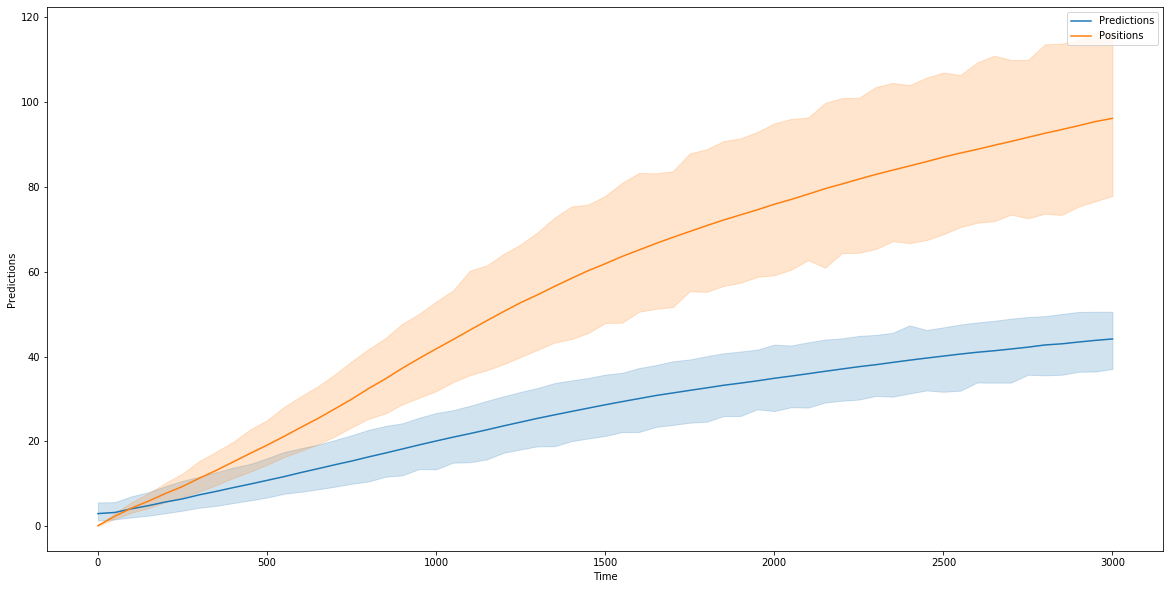

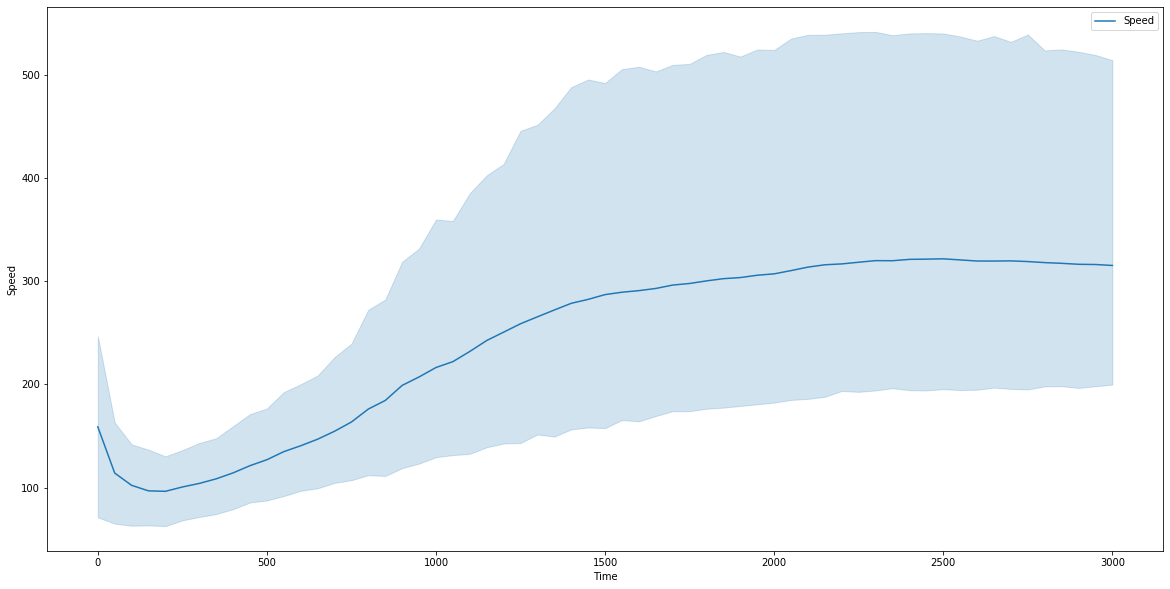

In [70]:
plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Time' , y = 'Predictions', data = meanRTI, label = "Predictions")
sns.lineplot(x = 'Time' , y = 'Positions', data = meanRTI, label = "Positions")
#sns.lineplot(x = 'Time' , y = 'Closest', data = meanRTI, label = "Closest")

plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Time' , y = 'Speed', data = meanRTI, label = "Speed")

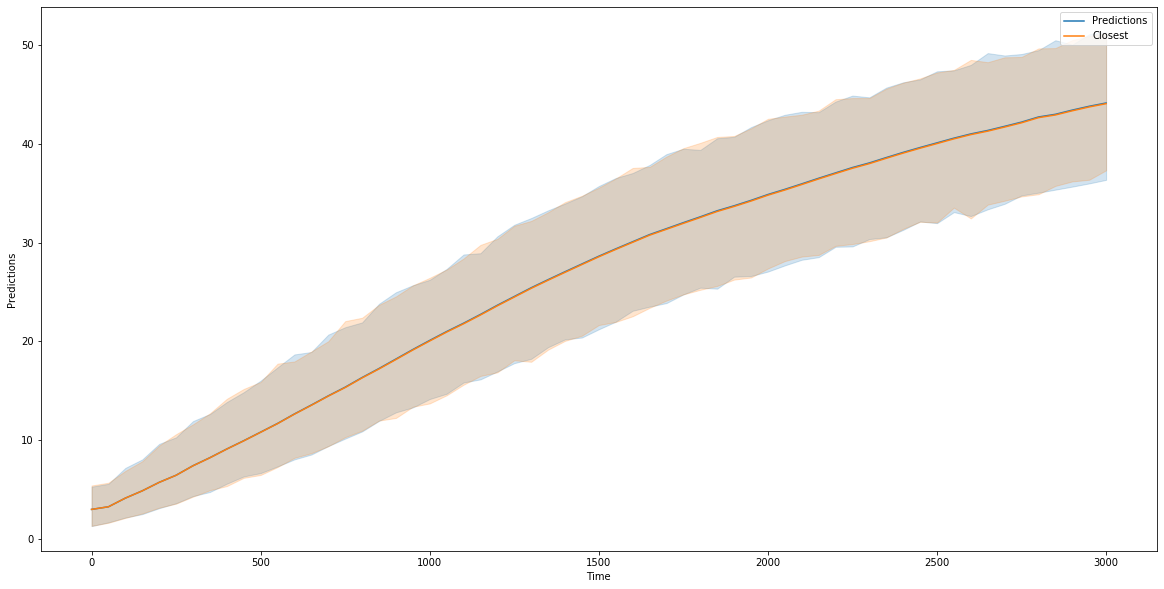

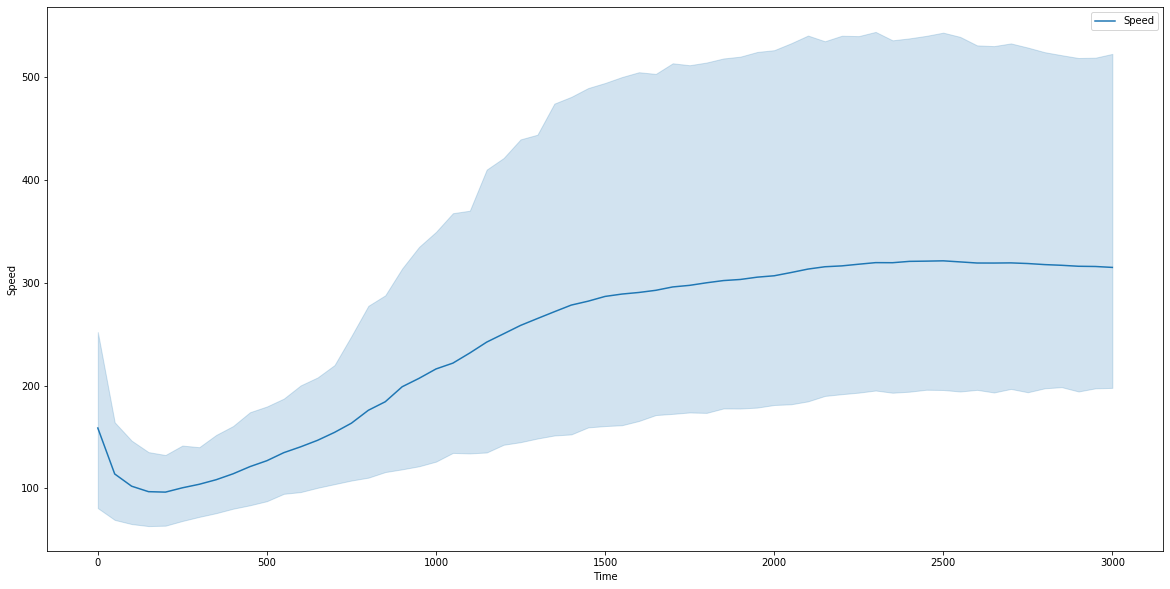

In [24]:
plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Time' , y = 'Predictions', data = meanRTI, label = "Predictions")
sns.lineplot(x = 'Time' , y = 'Closest', data = meanRTI, label = "Closest")

plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Time' , y = 'Speed', data = meanRTI, label = "Speed")

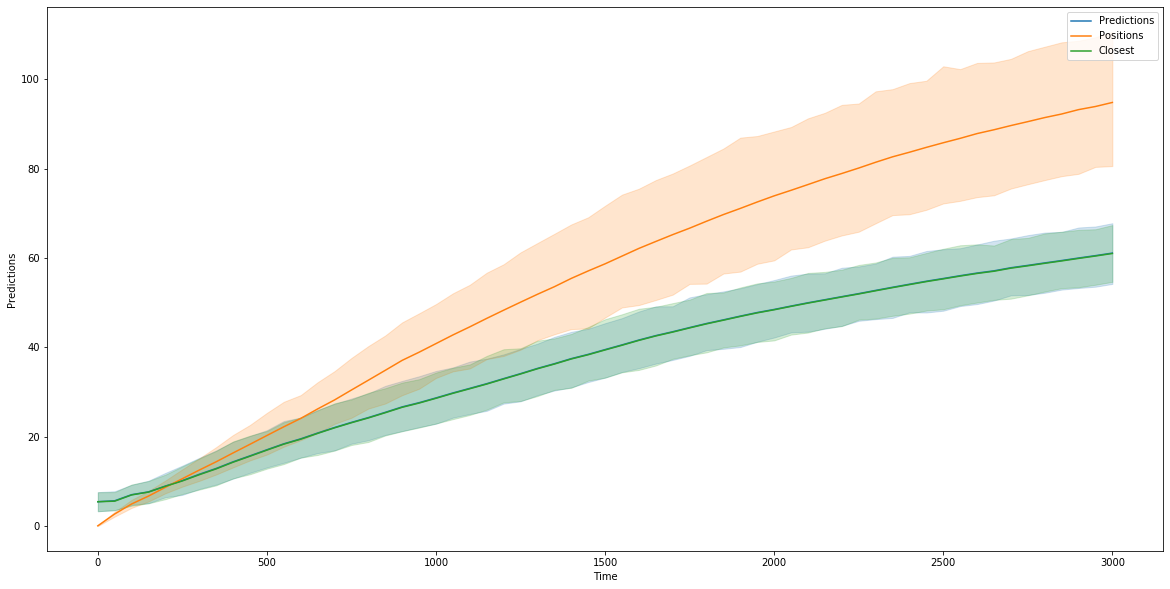

In [25]:
plt.figure(figsize = (20, 10))
#sns.lineplot(x = 'Time' , y = 'Predictions', hue = 'User', data = meanRTI)
#sns.lineplot(x = 'Time' , y = 'Positions', hue = 'User', data = meanRTI)
#sns.lineplot(x = 'Time' , y = 'Closest', hue = 'User', data = meanRTI)

sns.lineplot(x = 'Time' , y = 'Predictions', data = meanRHand, label = "Predictions")
sns.lineplot(x = 'Time' , y = 'Positions', data = meanRHand, label = "Positions")
sns.lineplot(x = 'Time' , y = 'Closest', data = meanRHand, label = "Closest")

In [26]:
# Per User, Whole hands // Right vs Left // Index + Thumb // Index // Thumb
# All users chart - Scale etc.
# Table with results / Clos/Pos/Pred/Speedb

## Conditions

### Scales

In [27]:
meanScale = pd.DataFrame()

for scale in range(0, len(scales)):
    for user in range(0, nbUsers):
        meanHand = pd.DataFrame()

        nbPhal = 0
        nbPhalClos = 0
        nbPhalPos = 0
        nbPhalSpeed = 0

        averagePred = 0
        averagePos = 0
        averageClos = 0
        averageSpeed = 0

        for time in range(0, 3050, 50):
            cond = (finalData['Scale'] == scales[scale]) & (finalData['Time'] == time) & (finalData['User'] == list_names[user])

            for phal in range(0, 38):
                if(len(finalData[cond]['PredToFinal.'+str(phal)].dropna()) != 0):
                    averagePred = averagePred + finalData[cond]['PredToFinal.'+str(phal)].mean()
                    nbPhal = nbPhal + 1

                if(len(finalData[cond]['PosToFinal.'+str(phal)].dropna()) != 0):
                    averagePos = averagePos + finalData[cond]['PosToFinal.'+str(phal)].mean()
                    nbPhalPos = nbPhalPos + 1

                if(len(finalData[cond]['ClosToFinal.'+str(phal)].dropna()) != 0):
                    averageClos = averageClos + finalData[cond]['ClosToFinal.'+str(phal)].mean()
                    nbPhalClos = nbPhalClos + 1

                if(len(finalData[cond]['Speed.'+str(phal)].dropna()) != 0):
                    averageSpeed = averageSpeed + finalData[cond]['Speed.'+str(phal)].mean()
                    nbPhalSpeed = nbPhalSpeed + 1


            if(nbPhal != 0):
                meanHand.loc[time, 'Predictions'] = averagePred/nbPhal

            if(nbPhalPos != 0):
                meanHand.loc[time, 'Positions'] = averagePos/nbPhalPos

            if(nbPhalClos != 0):
                meanHand.loc[time, 'Closest'] = averageClos/nbPhalClos

            if(nbPhalSpeed != 0):
                meanHand.loc[time, 'Speed'] = averageSpeed/nbPhalSpeed
                
                
        meanHand['User'] = list_names[user]
        meanHand['Scale'] = scales[scale]
        meanHand['Time'] = meanHand.index
        meanScale = pd.concat([meanHand, meanScale], axis = 0, sort = False)

In [28]:
meanScale.head()

Predictions  Positions   Closest      Speed   User  Scale  Time
0       1.118208   0.000000  1.118208        NaN  User8  large     0
50      1.201393   1.104559  1.201393  30.480300  User8  large    50
100     1.450882   1.671242  1.450882  32.637274  User8  large   100
150     1.517371   2.643214  1.517371  39.940476  User8  large   150
200     1.778304   3.507312  1.778304  41.105498  User8  large   200

In [29]:
meanScale.to_csv('./Analysis/AllUsers-Summary/Scales-'+ addword +'.csv', sep = ';')

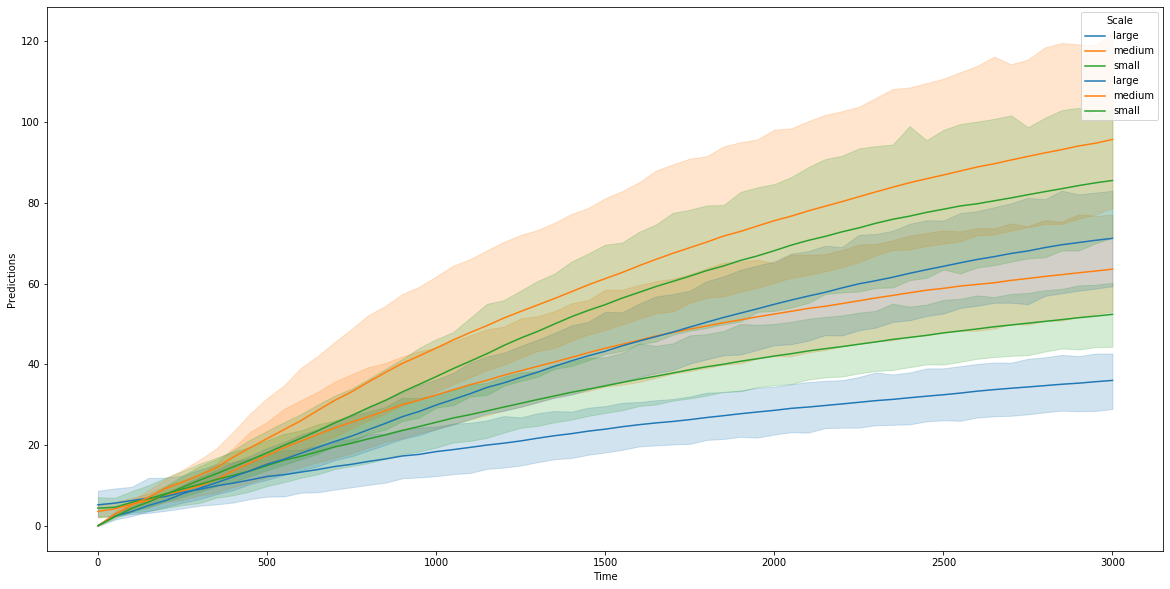

In [30]:
plt.figure(figsize = (20, 10))

sns.lineplot(x = 'Time' , y = 'Predictions', hue = 'Scale', data = meanScale)
sns.lineplot(x = 'Time' , y = 'Positions', hue = 'Scale', data = meanScale)
#sns.lineplot(x = 'Time' , y = 'Closest', data = meanScale, label = "Closest")

In [31]:
meanScaleRTI = pd.DataFrame()

for scale in range(0, len(scales)):
    for user in range(0, nbUsers):
        meanHand = pd.DataFrame()

        nbPhal = 0
        nbPhalClos = 0
        nbPhalPos = 0
        nbPhalSpeed = 0

        averagePred = 0
        averagePos = 0
        averageClos = 0
        averageSpeed = 0

        for time in range(0, 3050, 50):
            cond = (finalData['Scale'] == scales[scale]) & (finalData['Time'] == time) & (finalData['User'] == list_names[user])

            for phal in range(6, 10, 3):
                if(len(finalData[cond]['PredToFinal.'+str(phal)].dropna()) != 0):
                    averagePred = averagePred + finalData[cond]['PredToFinal.'+str(phal)].mean()
                    nbPhal = nbPhal + 1

                if(len(finalData[cond]['PosToFinal.'+str(phal)].dropna()) != 0):
                    averagePos = averagePos + finalData[cond]['PosToFinal.'+str(phal)].mean()
                    nbPhalPos = nbPhalPos + 1

                if(len(finalData[cond]['ClosToFinal.'+str(phal)].dropna()) != 0):
                    averageClos = averageClos + finalData[cond]['ClosToFinal.'+str(phal)].mean()
                    nbPhalClos = nbPhalClos + 1

                if(len(finalData[cond]['Speed.'+str(phal)].dropna()) != 0):
                    averageSpeed = averageSpeed + finalData[cond]['Speed.'+str(phal)].mean()
                    nbPhalSpeed = nbPhalSpeed + 1


            if(nbPhal != 0):
                meanHand.loc[time, 'Predictions'] = averagePred/nbPhal

            if(nbPhalPos != 0):
                meanHand.loc[time, 'Positions'] = averagePos/nbPhalPos

            if(nbPhalClos != 0):
                meanHand.loc[time, 'Closest'] = averageClos/nbPhalClos

            if(nbPhalSpeed != 0):
                meanHand.loc[time, 'Speed'] = averageSpeed/nbPhalSpeed
                
                
        meanHand['User'] = list_names[user]
        meanHand['Scale'] = scales[scale]
        meanHand['Time'] = meanHand.index
        meanScaleRTI = pd.concat([meanHand, meanScaleRTI], axis = 0, sort = False)

In [32]:
meanScaleRTI.head()

Predictions  Positions   Closest      Speed   User  Scale  Time
0       0.609717   0.000000  0.609717        NaN  User8  large     0
50      0.876200   1.534631  0.876200  44.572816  User8  large    50
100     1.240256   2.735812  1.240256  49.006534  User8  large   100
150     1.400297   3.836211  1.400297  51.969681  User8  large   150
200     1.561517   5.086158  1.561517  53.674049  User8  large   200

In [33]:
meanScaleRTI.to_csv('./Analysis/AllUsers-Summary/Scales-RTI-'+ addword +'.csv', sep = ';')

In [34]:
meanScaleRTI['Speed_m_per_sec'] = meanScaleRTI['Speed']/1000

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


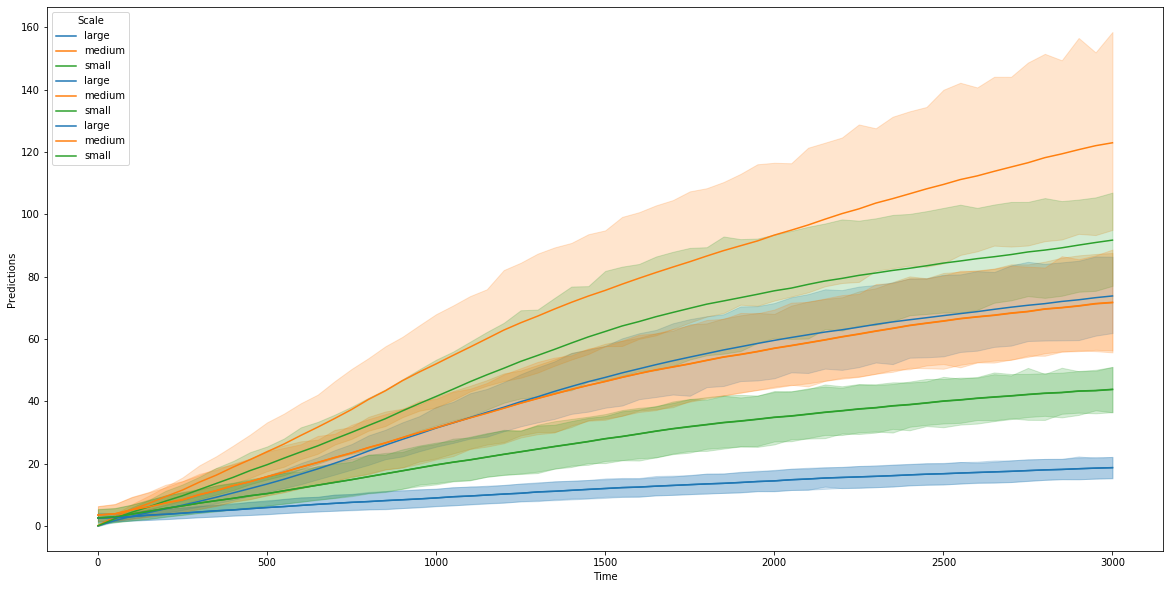

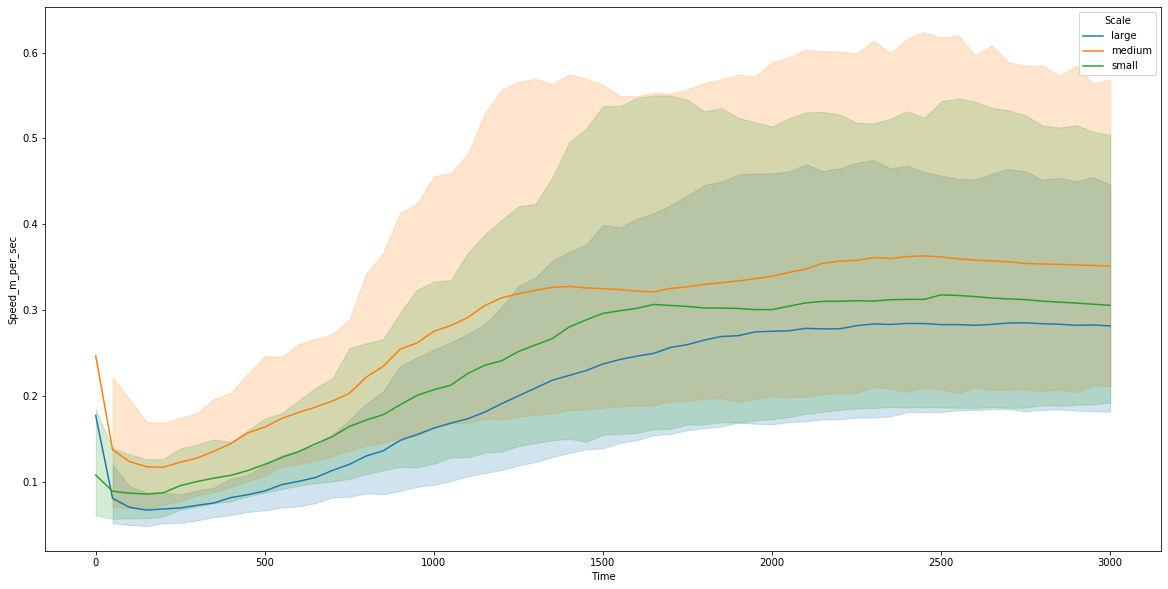

In [35]:
plt.figure(figsize = (20, 10))

sns.lineplot(x = 'Time' , y = 'Predictions', hue = 'Scale', data = meanScaleRTI)
sns.lineplot(x = 'Time' , y = 'Positions', hue = 'Scale', data = meanScaleRTI)
sns.lineplot(x = 'Time' , y = 'Closest', hue = 'Scale', data = meanScaleRTI)

plt.figure(figsize = (20, 10))
sns.lineplot(x = 'Time' , y = 'Speed_m_per_sec', hue = 'Scale', data = meanScaleRTI)



### Tasks

In [36]:
meanTaskRTI = pd.DataFrame()

for task in range(0, len(tasks)):
    for user in range(0, nbUsers):
        meanHand = pd.DataFrame()

        nbPhal = 0
        nbPhalClos = 0
        nbPhalPos = 0
        nbPhalSpeed = 0

        averagePred = 0
        averagePos = 0
        averageClos = 0
        averageSpeed = 0

        for time in range(0, 3050, 50):
            cond = (finalData['Task'] == tasks[task]) & (finalData['Time'] == time) & (finalData['User'] == list_names[user])

            for phal in range(6, 10, 3):
                if(len(finalData[cond]['PredToFinal.'+str(phal)].dropna()) != 0):
                    averagePred = averagePred + finalData[cond]['PredToFinal.'+str(phal)].mean()
                    nbPhal = nbPhal + 1

                if(len(finalData[cond]['PosToFinal.'+str(phal)].dropna()) != 0):
                    averagePos = averagePos + finalData[cond]['PosToFinal.'+str(phal)].mean()
                    nbPhalPos = nbPhalPos + 1

                if(len(finalData[cond]['ClosToFinal.'+str(phal)].dropna()) != 0):
                    averageClos = averageClos + finalData[cond]['ClosToFinal.'+str(phal)].mean()
                    nbPhalClos = nbPhalClos + 1

                if(len(finalData[cond]['Speed.'+str(phal)].dropna()) != 0):
                    averageSpeed = averageSpeed + finalData[cond]['Speed.'+str(phal)].mean()
                    nbPhalSpeed = nbPhalSpeed + 1


            if(nbPhal != 0):
                meanHand.loc[time, 'Predictions'] = averagePred/nbPhal

            if(nbPhalPos != 0):
                meanHand.loc[time, 'Positions'] = averagePos/nbPhalPos

            if(nbPhalClos != 0):
                meanHand.loc[time, 'Closest'] = averageClos/nbPhalClos

            if(nbPhalSpeed != 0):
                meanHand.loc[time, 'Speed'] = averageSpeed/nbPhalSpeed
                
                
        meanHand['User'] = list_names[user]
        meanHand['Time'] = meanHand.index

        meanHand['Task'] = tasks[task]
        meanTaskRTI = pd.concat([meanHand, meanTaskRTI], axis = 0, sort = False)

In [37]:
meanTaskRTI.tail()

Predictions   Positions    Closest       Speed   User  Time   Task
2800    35.463155  135.347647  35.158833  690.579762  User1  2800  Touch
2850    35.316161  137.212663  35.017087  682.316053  User1  2850  Touch
2900    35.476103  138.285548  35.181754  673.835559  User1  2900  Touch
2950    35.609907  140.307607  35.320464  670.771316  User1  2950  Touch
3000    35.365641  140.598697  35.080943  670.109208  User1  3000  Touch

In [38]:
meanTaskRTI.to_csv('./Analysis/AllUsers-Summary/Task-RTI-'+ addword +'.csv', sep = ';')

In [39]:
meanTaskRTI['Speed_m_per_sec'] = meanTaskRTI['Speed']/1000

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


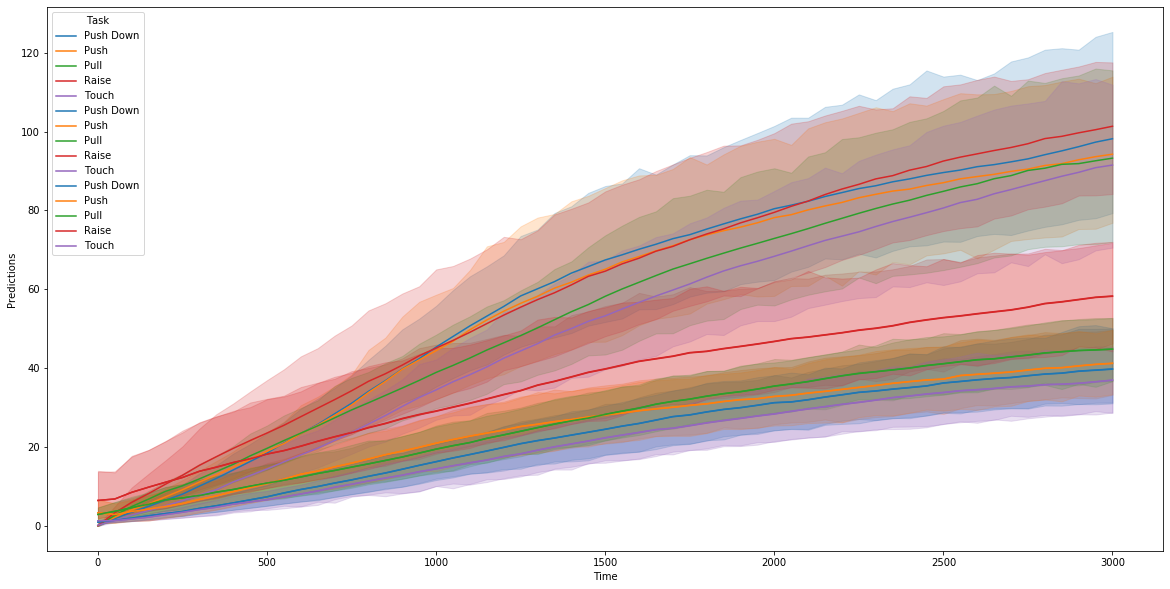

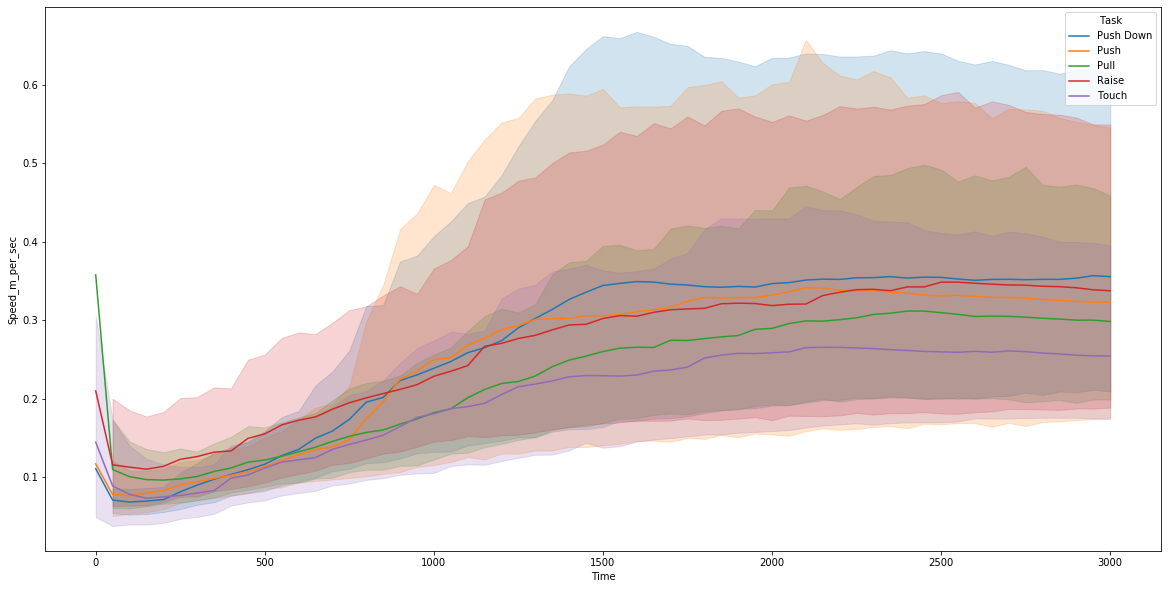

In [40]:
plt.figure(figsize = (20, 10))

sns.lineplot(x = 'Time' , y = 'Predictions', hue = 'Task', data = meanTaskRTI)
sns.lineplot(x = 'Time' , y = 'Positions', hue = 'Task', data = meanTaskRTI)
sns.lineplot(x = 'Time' , y = 'Closest', hue = 'Task', data = meanTaskRTI)

plt.figure(figsize = (20, 10))

sns.lineplot(x = 'Time' , y = 'Speed_m_per_sec', hue = 'Task', data = meanTaskRTI)

### Objects

In [41]:
meanObjRTI = pd.DataFrame()

for obj in range(0, len(objects)):
    for user in range(0, nbUsers):
        meanHand = pd.DataFrame()

        nbPhal = 0
        nbPhalClos = 0
        nbPhalPos = 0
        nbPhalSpeed = 0

        averagePred = 0
        averagePos = 0
        averageClos = 0
        averageSpeed = 0

        for time in range(0, 3050, 50):
            cond = (finalData['Obj'] == objects[obj]) & (finalData['Time'] == time) & (finalData['User'] == list_names[user])

            for phal in range(6, 10, 3):
                if(len(finalData[cond]['PredToFinal.'+str(phal)].dropna()) != 0):
                    averagePred = averagePred + finalData[cond]['PredToFinal.'+str(phal)].mean()
                    nbPhal = nbPhal + 1

                if(len(finalData[cond]['PosToFinal.'+str(phal)].dropna()) != 0):
                    averagePos = averagePos + finalData[cond]['PosToFinal.'+str(phal)].mean()
                    nbPhalPos = nbPhalPos + 1

                if(len(finalData[cond]['ClosToFinal.'+str(phal)].dropna()) != 0):
                    averageClos = averageClos + finalData[cond]['ClosToFinal.'+str(phal)].mean()
                    nbPhalClos = nbPhalClos + 1

                if(len(finalData[cond]['Speed.'+str(phal)].dropna()) != 0):
                    averageSpeed = averageSpeed + finalData[cond]['Speed.'+str(phal)].mean()
                    nbPhalSpeed = nbPhalSpeed + 1


            if(nbPhal != 0):
                meanHand.loc[time, 'Predictions'] = averagePred/nbPhal

            if(nbPhalPos != 0):
                meanHand.loc[time, 'Positions'] = averagePos/nbPhalPos

            if(nbPhalClos != 0):
                meanHand.loc[time, 'Closest'] = averageClos/nbPhalClos

            if(nbPhalSpeed != 0):
                meanHand.loc[time, 'Speed'] = averageSpeed/nbPhalSpeed
                
                
        meanHand['User'] = list_names[user]
        meanHand['Time'] = meanHand.index

        meanHand['Obj'] = objects[obj]
        meanObjRTI = pd.concat([meanHand, meanObjRTI], axis = 0, sort = False)

In [42]:
meanObjRTI.tail()

Predictions   Positions    Closest        Speed   User  Time   Obj
2800    38.906909  131.225870  38.523891  1012.513883  User1  2800  obj0
2850    38.707942  131.778289  38.323957   997.637182  User1  2850  obj0
2900    38.509585  132.430052  38.132108   985.684896  User1  2900  obj0
2950    38.283166  132.973829  37.911981   976.654982  User1  2950  obj0
3000    38.071640  133.451247  37.706539   963.599272  User1  3000  obj0

In [43]:
meanObjRTI.to_csv('./Analysis/AllUsers-Summary/Obj-RTI-'+ addword +'.csv', sep = ';')

In [44]:
meanObjRTI['Speed_m_per_sec'] = meanObjRTI['Speed']/1000

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


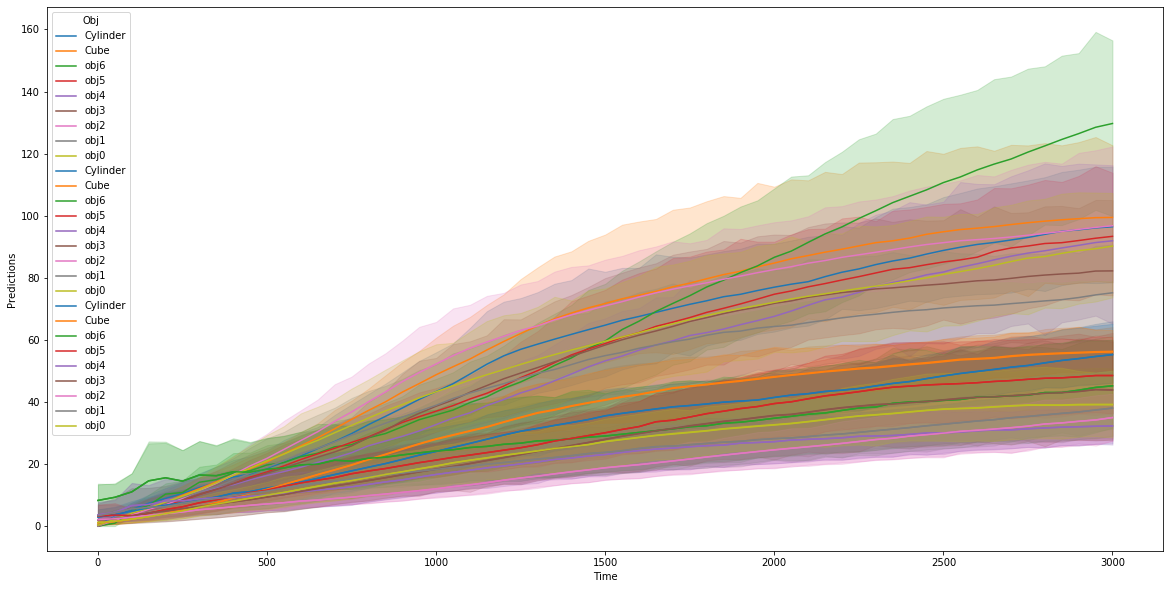

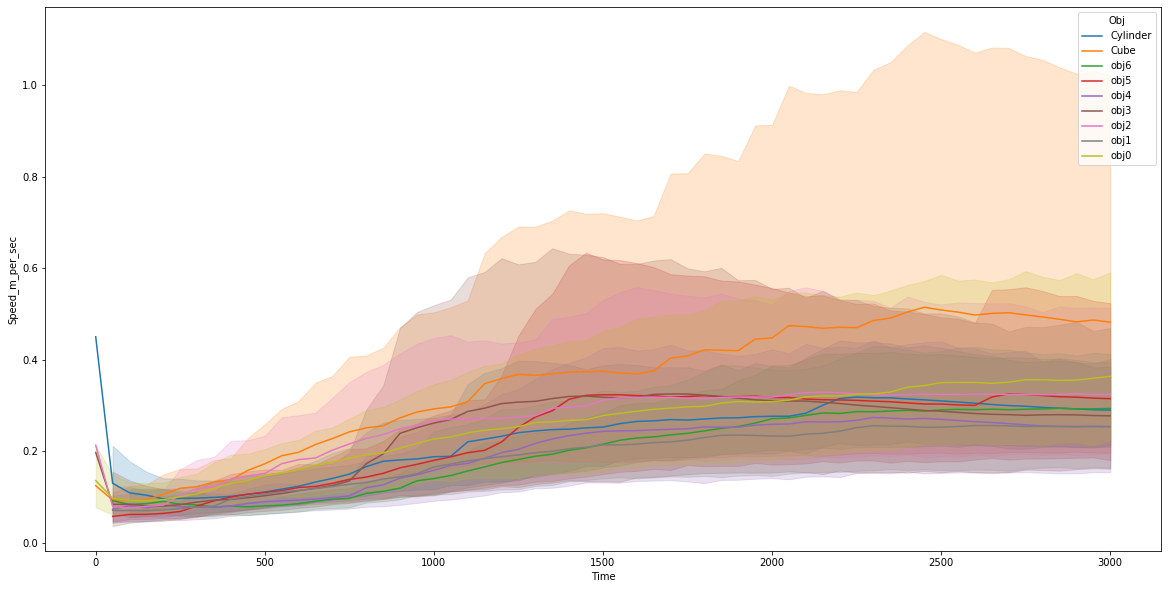

In [45]:
plt.figure(figsize = (20, 10))

sns.lineplot(x = 'Time' , y = 'Predictions', hue = 'Obj', data = meanObjRTI)
sns.lineplot(x = 'Time' , y = 'Positions', hue = 'Obj', data = meanObjRTI)
sns.lineplot(x = 'Time' , y = 'Closest', hue = 'Obj', data = meanObjRTI)

plt.figure(figsize = (20, 10))

sns.lineplot(x = 'Time' , y = 'Speed_m_per_sec', hue = 'Obj', data = meanObjRTI)

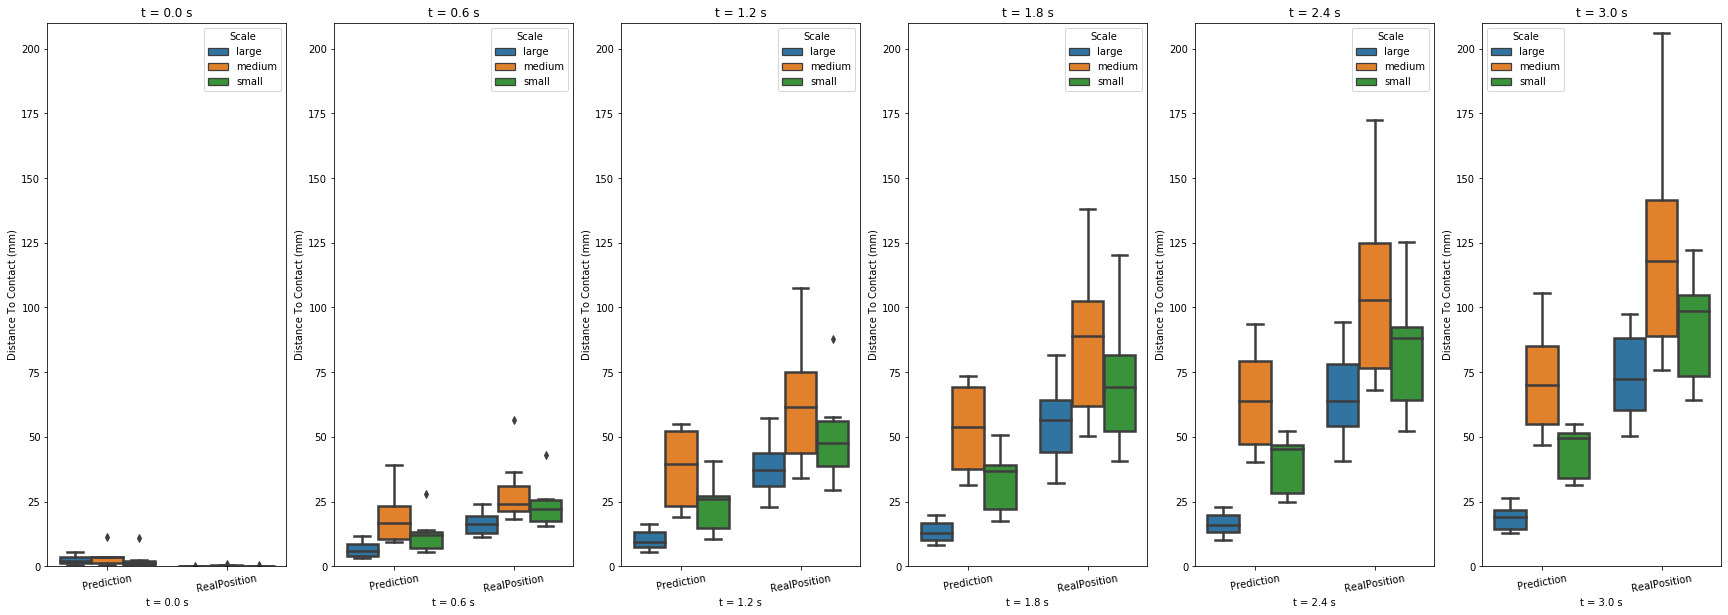

In [69]:
nameAx = []
nameFig = []
tolTime = [0, 600, 1200, 1800, 2400, 3000]
lim = [50, 150, 300, 500, 600]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):

    mdf = pd.DataFrame()
    cdf = pd.DataFrame()
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    df1 = pd.DataFrame(meanScaleRTI[meanScaleRTI['Time'] == tolTime[i]]['Predictions']).assign(Trial=1)
    #df1['DistInTolTime.'+str(tolTime[i])] = meanScaleRTI[meanScaleRTI['Time'] == tolTime[i]]['Predictions']
    df1['Scale'] = meanScaleRTI[meanScaleRTI['Time'] == tolTime[i]]['Scale']
    df1['Time'] = meanScaleRTI[meanScaleRTI['Time'] == tolTime[i]]['Time']
    df2 = pd.DataFrame(meanScaleRTI[meanScaleRTI['Time'] == tolTime[i]]['Positions']).assign(Trial=2)
    df2['Predictions'] = meanScaleRTI[meanScaleRTI['Time'] == tolTime[i]]['Positions']
    df2['Scale'] = meanScaleRTI[meanScaleRTI['Time'] == tolTime[i]]['Scale']
    df2['Time'] = meanScaleRTI[meanScaleRTI['Time'] == tolTime[i]]['Time']

    df2.assign(Trial=2)
    cdf = pd.concat([df1, df2], sort = False)                                # CONCATENATE
    mdf = pd.melt(cdf, id_vars=['Trial','Scale','Time'],value_vars='Predictions', var_name = 'Predictions')

    nameFig[i] = sns.boxplot(x= "Trial", y="value", hue = 'Scale', data=mdf, linewidth = 2.5, ax = nameAx[i])  # RUN PLOT   
    #nameFig[i] = sns.boxplot(x = "Scale", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])

    #, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[i].set_ylabel('Distance To Contact (mm)')
    nameFig[i].set_xlabel('t = '+str(tolTime[i]/1000) + ' s')
    nameAx[i].title.set_text('t = '+str(tolTime[i]/1000) + ' s')      
    #nameFig[i].set_ylim(0, lim[i])
    
for ax in nameFig:
    tl = ['Prediction', 'RealPosition']#ax.get_xticklabels()#['Prediction/Contact', 'RealPosition/Contact'])
    ax.set_xticklabels(tl, rotation=10)
    ax.set_ylim(0, 210)

##plt.savefig('./AllFingers-38-ScaleBoxplot-Predict-RealPos.pdf')

## Summary Table Predictions/Closest/Positions at t_0, t_25%, t_50%, t_75%

In [81]:
tableTime = [0, 300, 600, 1200, 1800, 2400, 3000]
summaryTable = pd.DataFrame()
for time in range(0, len(tableTime)):
    summaryTable.loc[tableTime[time], 'Predictions_Hands'] = meanHands[meanHands['Time'] == tableTime[time]]['Predictions'].mean()
    summaryTable.loc[tableTime[time], 'Predictions_R-Hand'] = meanRHand[meanRHand['Time'] == tableTime[time]]['Predictions'].mean()
    summaryTable.loc[tableTime[time], 'Predictions_Index'] = meanI[meanI['Time'] == tableTime[time]]['Predictions'].mean()
    summaryTable.loc[tableTime[time], 'Predictions_Thumb'] = meanT[meanT['Time'] == tableTime[time]]['Predictions'].mean()
    summaryTable.loc[tableTime[time], 'Predictions_RTI'] = meanRTI[meanRTI['Time'] == tableTime[time]]['Predictions'].mean()

    summaryTable.loc[tableTime[time], 'Positions_Hands'] = meanHands[meanHands['Time'] == tableTime[time]]['Positions'].mean()
    summaryTable.loc[tableTime[time], 'Positions_R-Hand'] = meanRHand[meanRHand['Time'] == tableTime[time]]['Positions'].mean()
    summaryTable.loc[tableTime[time], 'Positions_Index'] = meanI[meanI['Time'] == tableTime[time]]['Positions'].mean()
    summaryTable.loc[tableTime[time], 'Positions_Thumb'] = meanT[meanT['Time'] == tableTime[time]]['Positions'].mean()
    summaryTable.loc[tableTime[time], 'Positions_RTI'] = meanRTI[meanRTI['Time'] == tableTime[time]]['Positions'].mean()

    summaryTable.loc[tableTime[time], 'Closest_Hands'] = meanHands[meanHands['Time'] == tableTime[time]]['Closest'].mean()
    summaryTable.loc[tableTime[time], 'Closest_R-Hand'] = meanRHand[meanRHand['Time'] == tableTime[time]]['Closest'].mean()
    summaryTable.loc[tableTime[time], 'Closest_Index'] = meanI[meanI['Time'] == tableTime[time]]['Closest'].mean()
    summaryTable.loc[tableTime[time], 'Closest_Thumb'] = meanT[meanT['Time'] == tableTime[time]]['Closest'].mean()
    summaryTable.loc[tableTime[time], 'Closest_RTI'] = meanRTI[meanRTI['Time'] == tableTime[time]]['Closest'].mean()
    
stdTable = pd.DataFrame()
for time in range(0, len(tableTime)):
    stdTable.loc[tableTime[time], 'Predictions_Hands'] = meanHands[meanHands['Time'] == tableTime[time]]['Predictions'].std()
    stdTable.loc[tableTime[time], 'Predictions_R-Hand'] = meanRHand[meanRHand['Time'] == tableTime[time]]['Predictions'].std()
    stdTable.loc[tableTime[time], 'Predictions_Index'] = meanI[meanI['Time'] == tableTime[time]]['Predictions'].std()
    stdTable.loc[tableTime[time], 'Predictions_Thumb'] = meanT[meanT['Time'] == tableTime[time]]['Predictions'].std()
    stdTable.loc[tableTime[time], 'Predictions_RTI'] = meanRTI[meanRTI['Time'] == tableTime[time]]['Predictions'].std()

    stdTable.loc[tableTime[time], 'Positions_Hands'] = meanHands[meanHands['Time'] == tableTime[time]]['Positions'].std()
    stdTable.loc[tableTime[time], 'Positions_R-Hand'] = meanRHand[meanRHand['Time'] == tableTime[time]]['Positions'].std()
    stdTable.loc[tableTime[time], 'Positions_Index'] = meanI[meanI['Time'] == tableTime[time]]['Positions'].std()
    stdTable.loc[tableTime[time], 'Positions_Thumb'] = meanT[meanT['Time'] == tableTime[time]]['Positions'].std()
    stdTable.loc[tableTime[time], 'Positions_RTI'] = meanRTI[meanRTI['Time'] == tableTime[time]]['Positions'].std()

    stdTable.loc[tableTime[time], 'Closest_Hands'] = meanHands[meanHands['Time'] == tableTime[time]]['Closest'].std()
    stdTable.loc[tableTime[time], 'Closest_R-Hand'] = meanRHand[meanRHand['Time'] == tableTime[time]]['Closest'].std()
    stdTable.loc[tableTime[time], 'Closest_Index'] = meanI[meanI['Time'] == tableTime[time]]['Closest'].std()
    stdTable.loc[tableTime[time], 'Closest_Thumb'] = meanT[meanT['Time'] == tableTime[time]]['Closest'].std()
    stdTable.loc[tableTime[time], 'Closest_RTI'] = meanRTI[meanRTI['Time'] == tableTime[time]]['Closest'].std()
    

In [82]:
summaryTable

Predictions_Hands  Predictions_R-Hand  Predictions_Index  \
0              3.820226            5.501275           3.130088   
300            9.770249           11.635821           7.784948   
600           20.161820           19.561857          13.533506   
1200          34.461281           33.030873          25.701223   
1800          45.150896           45.358249          34.778642   
2400          52.470468           54.142416          40.719773   
3000          58.038690           61.107695          45.415806   

      Predictions_Thumb  Predictions_RTI  Positions_Hands  Positions_R-Hand  \
0              2.833561         2.981824         0.076988          0.105227   
300            7.035954         7.410451        12.159294         12.574226   
600           11.780931        12.657218        24.920828         24.128408   
1200          21.642240        23.671732        48.244284         48.330568   
1800          30.485426        32.632034        65.902977         68.229989   
2400          37.603998        39.161886        79.421723         83.662941   
3000          42.919035        44.167421        89.075626         94.794898   

      Positions_Index  Positions_Thumb  Positions_RTI  Closest_Hands  \
0            0.158604         0.093399       0.126001       3.816259   
300         12.308009        10.349430      11.328720       9.714839   
600         25.010182        21.628306      23.319244      20.096843   
1200        54.244766        47.043128      50.643947      34.398846   
1800        76.053987        65.738733      70.896360      45.091377   
2400        90.838085        79.115169      84.976627      52.410877   
3000       102.365193        90.007256      96.186224      57.978517   

      Closest_R-Hand  Closest_Index  Closest_Thumb  Closest_RTI  
0           5.493374       3.127997       2.833561     2.980779  
300        11.535725       7.763530       7.033953     7.398741  
600        19.479157      13.499221      11.769564    12.634393  
1200       32.950260      25.641689      21.591268    23.616478  
1800       45.277339      34.706018      30.426003    32.566011  
2400       54.056761      40.651888      37.535739    39.093813  
3000       61.018330      45.346312      42.854785    44.100549

In [83]:
stdTable

Predictions_Hands  Predictions_R-Hand  Predictions_Index  \
0              2.111914            3.145463           3.682176   
300            4.277601            5.258235           5.872509   
600           12.560569            6.912425           7.926502   
1200          16.261310            8.748989          10.335257   
1800          17.828446            9.412786          11.024901   
2400          18.354740            9.663073          11.063366   
3000          17.740035            9.720815          11.758089   

      Predictions_Thumb  Predictions_RTI  Positions_Hands  Positions_R-Hand  \
0              2.601948         3.022004         0.049331          0.094395   
300            5.778910         5.744575         4.676853          3.644768   
600            7.452442         7.570432        14.771139          7.793189   
1200           9.709847         9.905765        22.625187         15.402084   
1800          10.994520        10.860290        26.436286         20.077879   
2400          11.536433        10.947452        28.955586         21.592253   
3000          10.598990        10.427622        28.614014         22.416169   

      Positions_Index  Positions_Thumb  Positions_RTI  Closest_Hands  \
0            0.182689         0.133795       0.150361       2.112081   
300          5.894802         4.787386       5.294268       4.254270   
600         10.403892         8.989251       9.504614      12.509825   
1200        21.322156        18.734337      19.382150      16.207775   
1800        27.492289        23.828118      25.064679      17.772232   
2400        29.868455        25.888304      27.298998      18.297723   
3000        31.725454        25.857017      28.314272      17.693435   

      Closest_R-Hand  Closest_Index  Closest_Thumb  Closest_RTI  
0           3.143050       3.680857       2.601948     3.021626  
300         5.216293       5.878326       5.778372     5.747977  
600         6.857283       7.909513       7.437934     7.554858  
1200        8.694908      10.293372       9.633625     9.848310  
1800        9.354525      10.975071      10.948921    10.812313  
2400        9.603253      11.040965      11.524598    10.927032  
3000        9.667151      11.778786      10.588308    10.433858

In [62]:
meanScaleRTI.columns, meanTaskRTI.columns

(Index(['Predictions', 'Positions', 'Closest', 'Speed', 'User', 'Scale', 'Time',
        'Speed_m_per_sec'],
       dtype='object'),
 Index(['Predictions', 'Positions', 'Closest', 'Speed', 'User', 'Time', 'Task',
        'Speed_m_per_sec'],
       dtype='object'))

## RTI Heatmap Task/Scale

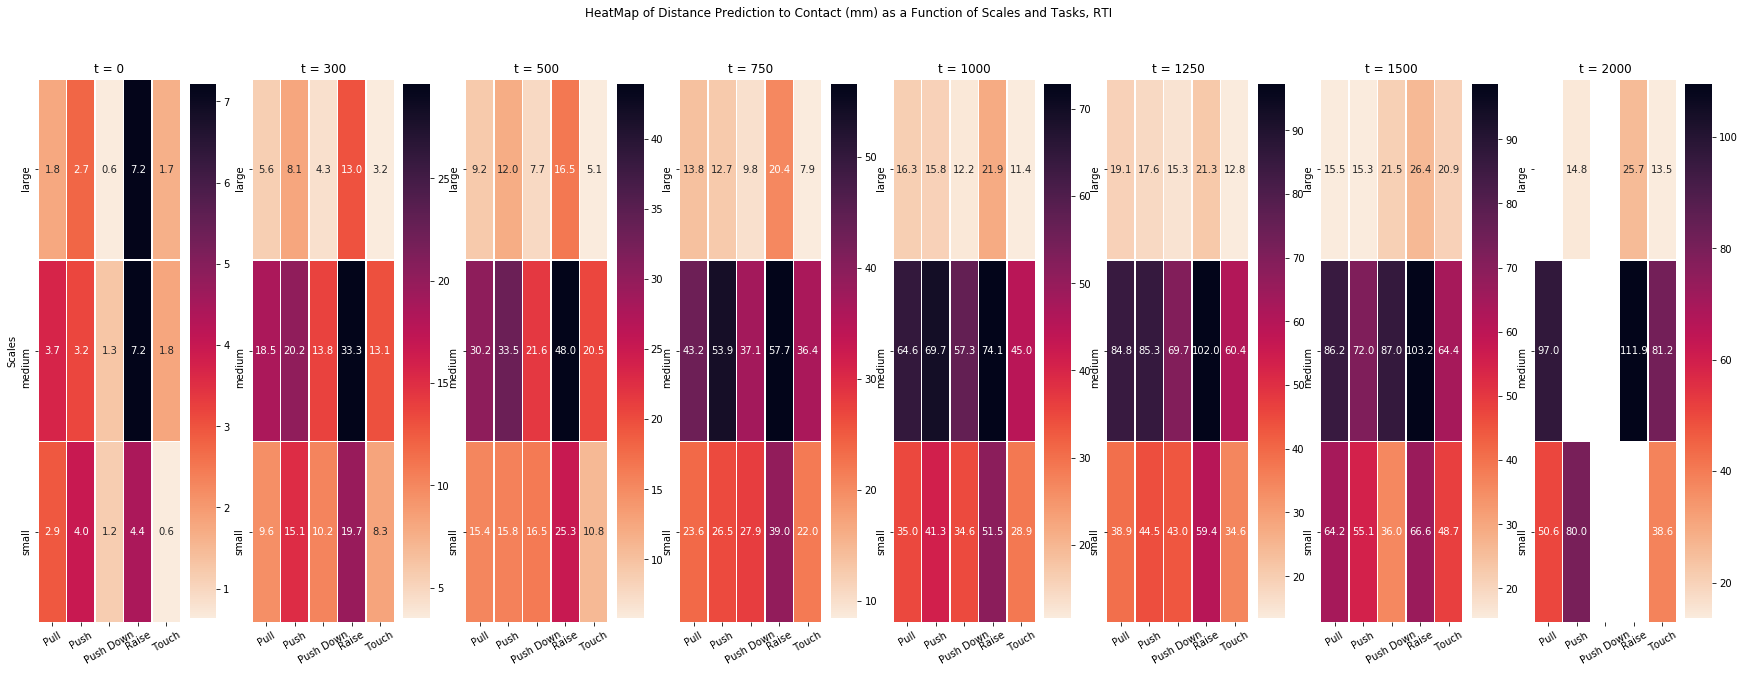

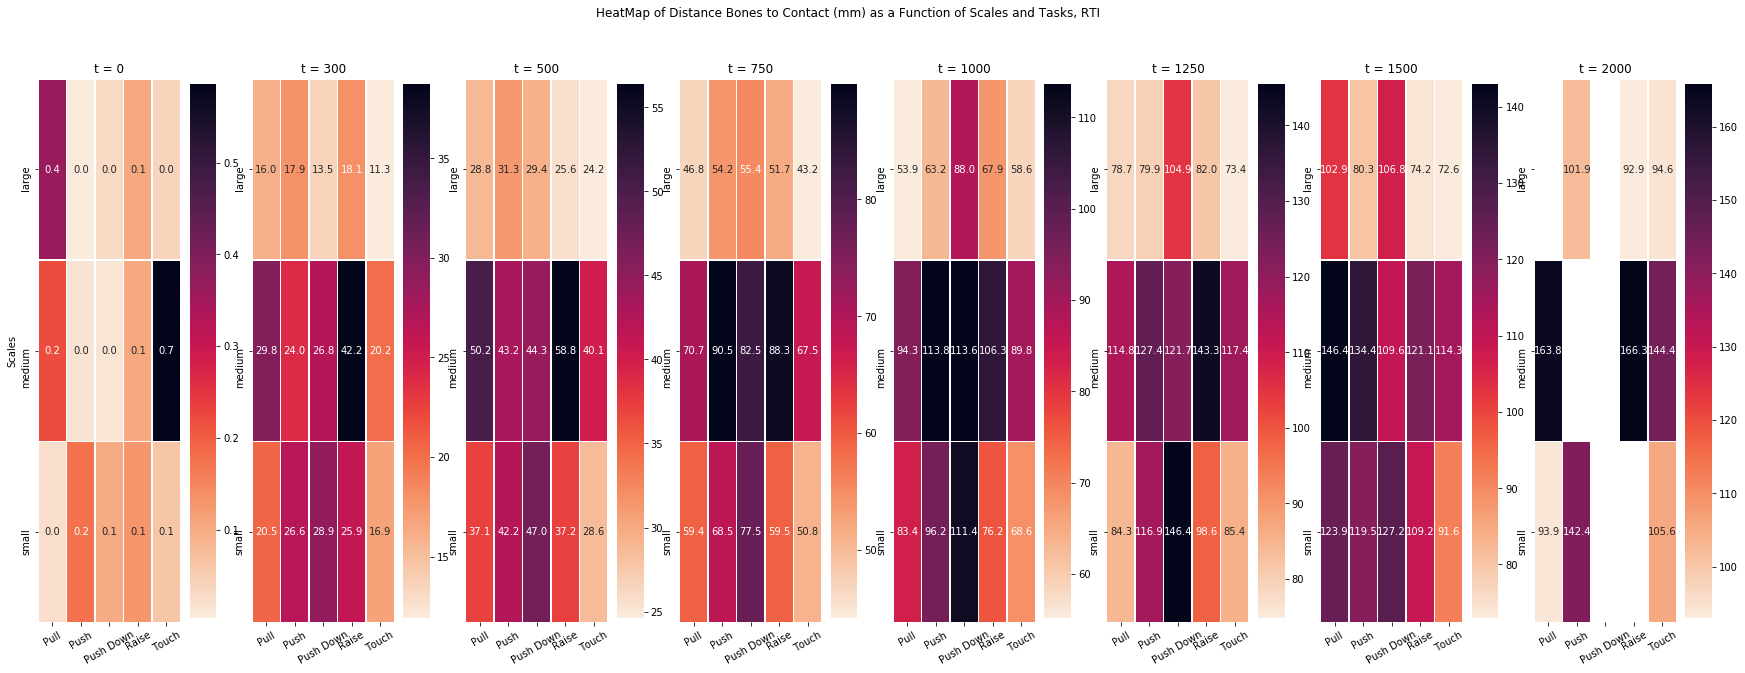

In [85]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]
#tolTime = [0, 100, 200, 300, 400, 500, 600, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    taskScale = pd.DataFrame()

    tol = tolTime[i]
    for size in range(0, len(scales)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (finalData['Task'] == tasks[gest]) & (finalData['Scale'] == scales[size]) & (finalData['User'] == list_names[users]) & (finalData['Time'] == tol)        
                mean += (finalData[cond]['PredToFinal.9'].mean() + finalData[cond]['PredToFinal.6'].mean())/2

            taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskScale.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Scales and Tasks, RTI')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    taskScale = pd.DataFrame()

    tol = tolTime[i]
    for size in range(0, len(scales)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (finalData['Task'] == tasks[gest]) & (finalData['Scale'] == scales[size]) & (finalData['User'] == list_names[users]) & (finalData['Time'] == tol)        
                mean += (finalData[cond]['PosToFinal.9'].mean() + finalData[cond]['PosToFinal.6'].mean())/2

            taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskScale.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Scales and Tasks, RTI')

plt.show()

## RTI Heatmap Task/Object

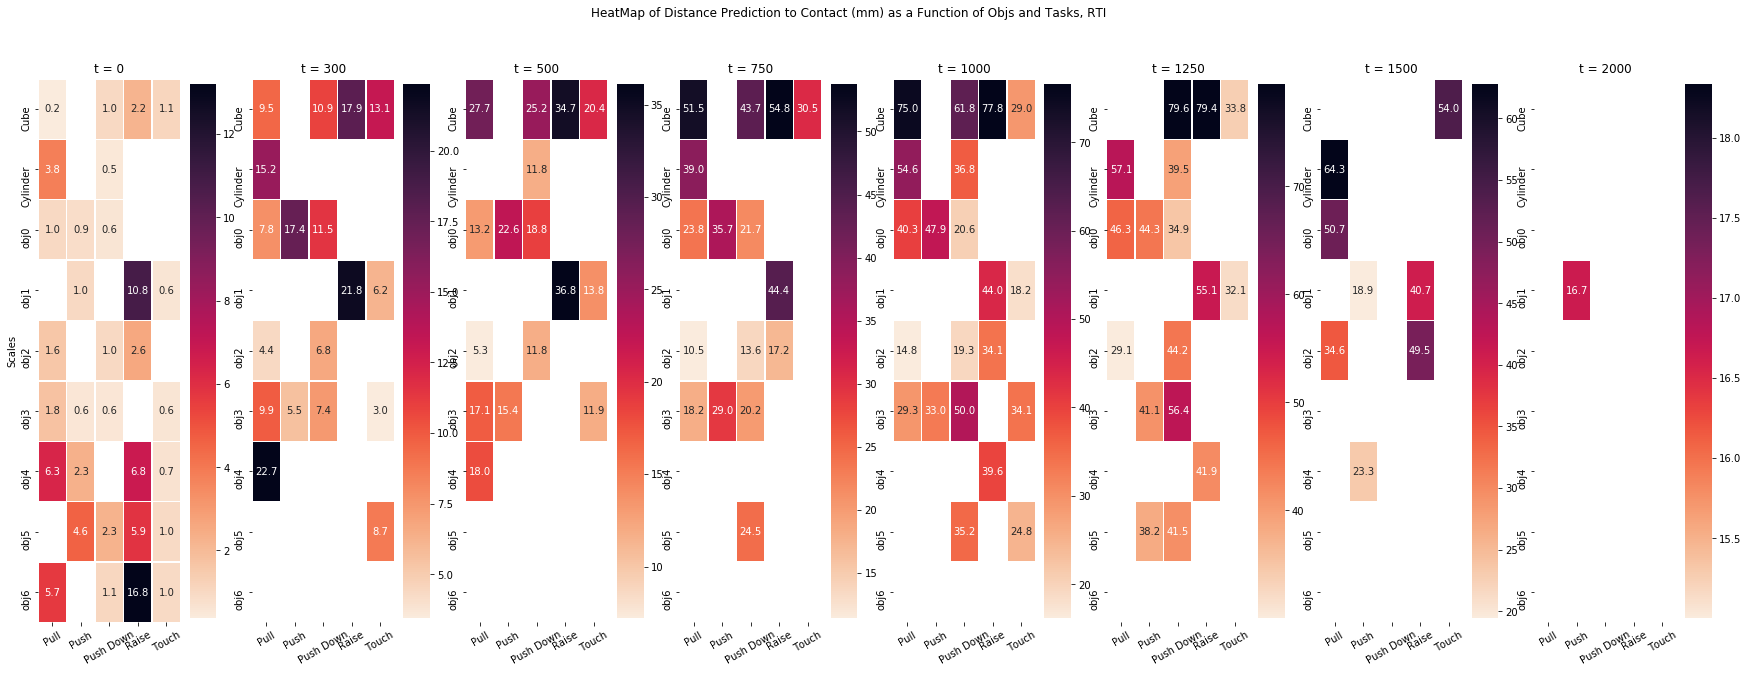

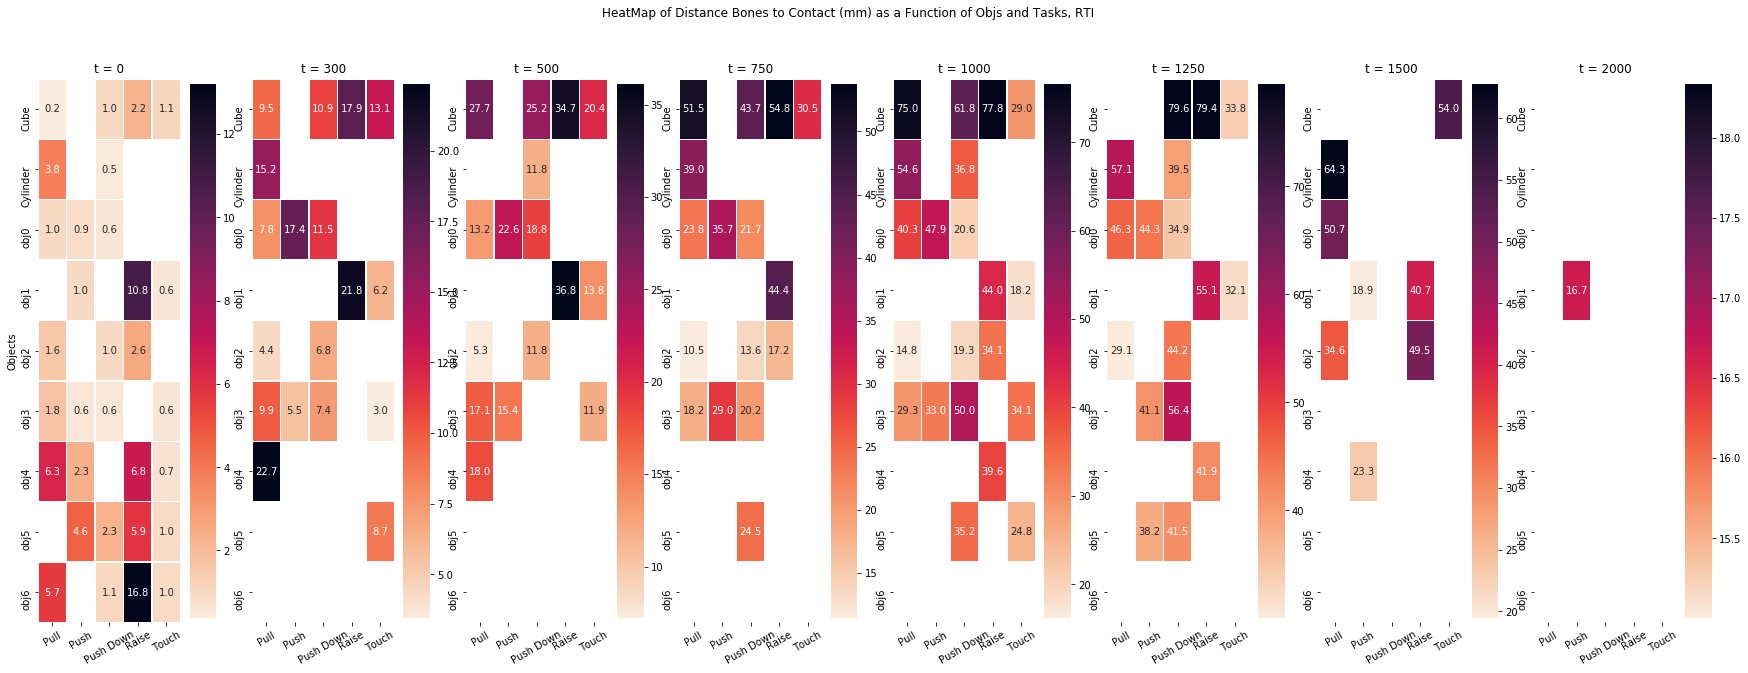

In [86]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]
#tolTime = [0, 100, 200, 300, 400, 500, 600, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    taskObj = pd.DataFrame()

    tol = tolTime[i]
    for obj in range(0, len(objects)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (finalData['Task'] == tasks[gest]) & (finalData['Obj'] == objects[obj]) & (finalData['User'] == list_names[users]) & (finalData['Time'] == tol)        
                mean += (finalData[cond]['PredToFinal.9'].mean() + finalData[cond]['PredToFinal.6'].mean())/2

            taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Objs and Tasks, RTI')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    taskObj = pd.DataFrame()

    tol = tolTime[i]
    for obj in range(0, len(objects)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (finalData['Task'] == tasks[gest]) & (finalData['Obj'] == objects[obj]) & (finalData['User'] == list_names[users]) & (finalData['Time'] == tol)        
                mean += (finalData[cond]['PredToFinal.9'].mean() + finalData[cond]['PredToFinal.6'].mean())/2

            taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
      
    nameFig[i] = sns.heatmap(taskObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Objs and Tasks, RTI')

plt.show()

## RTI Heatmap Scale/Object

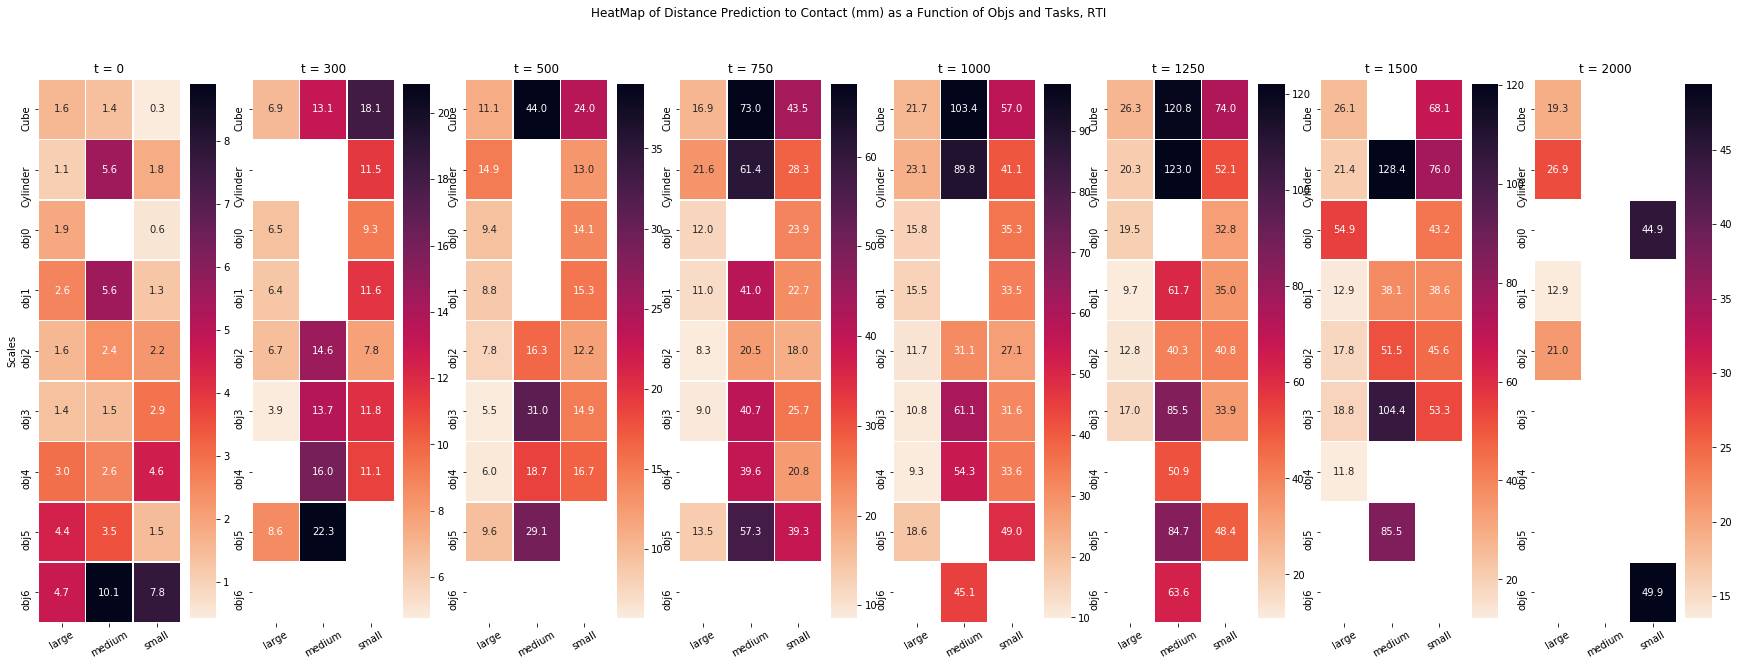

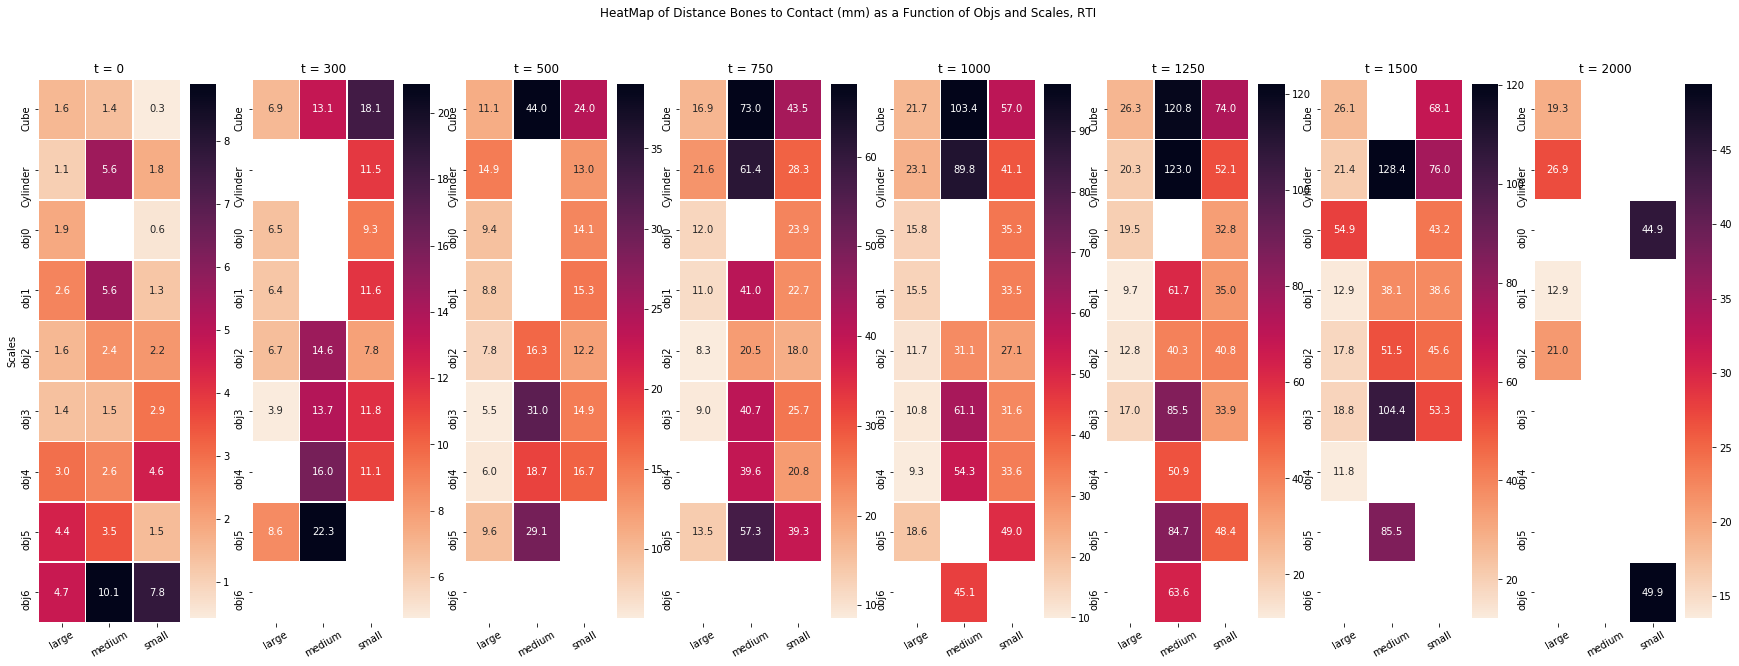

In [87]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]
#tolTime = [0, 100, 200, 300, 400, 500, 600, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    objScale = pd.DataFrame()

    tol = tolTime[i]
    for obj in range(0, len(objects)):
        for size in range (0, len(scales)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (finalData['Scale'] == scales[size]) & (finalData['Obj'] == objects[obj]) & (finalData['User'] == list_names[users]) & (finalData['Time'] == tol)        
                mean += (finalData[cond]['PredToFinal.9'].mean() + finalData[cond]['PredToFinal.6'].mean())/2

            objScale.loc[objects[obj], scales[size]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(objScale.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Objs and Tasks, RTI')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    objScale = pd.DataFrame()

    tol = tolTime[i]
    for obj in range(0, len(objects)):
        for size in range (0, len(scales)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (finalData['Scale'] == scales[size]) & (finalData['Obj'] == objects[obj]) & (finalData['User'] == list_names[users]) & (finalData['Time'] == tol)        
                mean += (finalData[cond]['PredToFinal.9'].mean() + finalData[cond]['PredToFinal.6'].mean())/2

            objScale.loc[objects[obj], scales[size]] = mean/nbUsers
      
    nameFig[i] = sns.heatmap(objScale.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Objs and Scales, RTI')

plt.show()